Neutrino Mass Matrices

In [1]:
import numpy as np
import sympy as sy
import math
from numpy.random import default_rng
import matplotlib.pyplot as plt

Definimos las matrices de Gell-Mann

In [2]:
l0 = (np.sqrt(2/3))*np.array([[1,0,0],[0,1,0],[0,0,1]])
l1 = np.array([[0,1,0],[1,0,0],[0,0,0]])
l2 = np.array([[0,-1j,0],[1j,0,0],[0,0,0]])
l3 = np.array([[1,0,0],[0,-1,0],[0,0,0]])
l4 = np.array([[0,0,1],[0,0,0],[1,0,0]])
l5 = np.array([[0,0,-1j],[0,0,0],[1j,0,0]])
l6 = np.array([[0,0,0],[0,0,1],[0,1,0]])
l7 = np.array([[0,0,0],[0,0,-1j],[0,1j,0]])
l8 = (1/math.sqrt(3))*np.array([[1,0,0],[0,1,0],[0,0,-2]])

lam = np.array([l0,l1,l2,l3,l4,l5,l6,l7,l8])
# print('l1=', l1, 'l2=', l2, 'l3=', l3 , 'l4=',l4 ,'l5=',l5 , 'l6=', l6, 'l7=',l7 , 'l8',l8)

Definimos un producto punto entre matrices

In [3]:
Ra=default_rng(42).random((3,3))

def matrixdot(A,B):
    return np.trace(A@B)/2

def matrixcoeff(A):
    cr =np.zeros(shape=(9), dtype = 'complex_')
    for n in range(0,9):
        cr[n] = matrixdot(A,lam[n])
    return cr

In [4]:
(matrixdot(lam[4], lam[4])) 

(1+0j)

In [5]:
(matrixcoeff(lam[8]))


array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       1.+0.j])

In [6]:

np.einsum('i,ijk',matrixcoeff(Ra),lam)


array([[0.77395605+0.j, 0.43887844+0.j, 0.85859792+0.j],
       [0.69736803+0.j, 0.09417735+0.j, 0.97562235+0.j],
       [0.7611397 +0.j, 0.78606431+0.j, 0.12811363+0.j]])

In [7]:
Ra - np.einsum('i,ijk',matrixcoeff(Ra),lam)

array([[ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j, -2.77555756e-17+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  1.11022302e-16+0.j]])

Definimos las matrices diagonales para las masas de los quarks; up, down y ()

In [8]:
m_u=2.16e+6
m_c=1.27e+9
m_t=172.69e+9
m_b=4.18e+9
m_d=4.67e+6
m_s=93e+6
m_e=0.51099e+6
m_mu=105.6583e+6
m_tau=1776.86e+6

Mu= (1/m_t)*np.diagflat([m_u,m_c,m_t], 0)
print(Mu)
Md= (1/m_b)*np.diagflat([m_d,m_s,m_b],0)
print(Md)
Ml= (1/m_tau)*np.diagflat([m_e,m_mu,m_tau],0)
print(Ml)

[[1.25079622e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.35421854e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[0.00111722 0.         0.        ]
 [0.         0.0222488  0.        ]
 [0.         0.         1.        ]]
[[2.87580338e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.94634918e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [9]:
matrixcoeff(Mu)

array([ 0.41125574+0.j,  0.        +0.j,  0.        +0.j, -0.00367086+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.57522368+0.j])

In [10]:
matrixcoeff(Md)

array([ 0.41778743+0.j,  0.        +0.j,  0.        +0.j, -0.01056579+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.57060508+0.j])

In [11]:
matrixcoeff(Ml)

array([ 0.43264156+0.j,  0.        +0.j,  0.        +0.j, -0.02958796+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.56010162+0.j])

Calculamos $C_0$ para $M$

In [12]:
C01=np.sqrt(3/2)*matrixdot(l0, Mu)
print('C_01=',C01)

C_01= 0.5036833632520701


In [13]:
C02=np.sqrt(3/2)*matrixdot(l0, Md)
print('C_02=',C02)

C_02= 0.5116830143540669


In [14]:
C03=np.sqrt(3/2)*matrixdot(l0, Ml)
print('C_03=',C03)

C_03= 0.5298755360579899


Calculamos la derivada de $C_0$ respecto a las masas en $M_u, M_d y M_l$.

Para +$\Delta$

In [15]:
C0Mu= 1/m_t
C0Mc= 1/m_t
C0Mt= -(m_u+m_c)/m_t**2
dm_u=0.49e+6
dm_c=0.02e+9
dm_t=0.4e+9

DC01= C0Mu*dm_u + C0Mc*dm_c + C0Mt*dm_t
print(DC01)

0.00010158844981379264


In [16]:
C0Md=1/m_b
C0Ms=1/m_b
C0Mb=-(m_d+m_s)/m_b**2
dm_d=0.48e+6
dm_b=0.03e+9
dm_s=11e+6
DC02= C0Md*dm_d + C0Ms*dm_s + C0Mb*dm_b
print(DC02)

0.002578712712621048


In [17]:
C0Me=1/m_tau
C0Mmu=1/m_tau
C0Mtau=(m_e+m_mu)/m_tau**2
dm_e=0.0000000031e+6
dm_mu=0.0000024e+6
dm_tau=0.12e+6
DC03= C0Me*dm_e + C0Mmu*dm_mu + C0Mtau*dm_tau
print(DC03)

4.036633023376959e-06


$\Delta C_{0u}= 0.00010158844981379264$

$\Delta C_{0d}= 0.002578712712621048$

$\Delta C_{0l}=4.036633023376959e-06$

Ahora construimos la gráfica de errores para cada matriz.

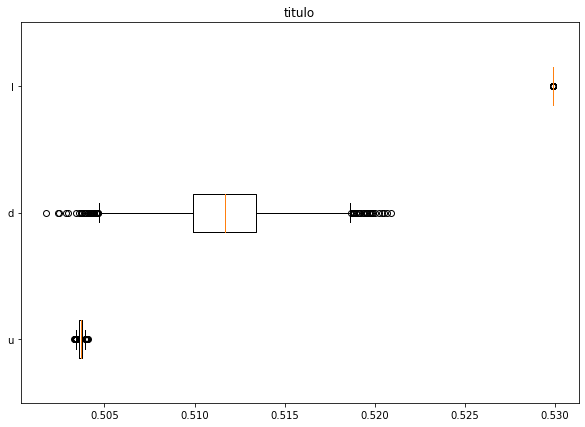

In [18]:
data1 = np.random.normal(C01, DC01, 10000)
data2 = np.random.normal(C02, DC02, 10000)
data3 = np.random.normal(C03, DC03, 10000)
data= [data1,data2,data3]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)


plt.boxplot(data, labels=['u', 'd', 'l'], vert=0)
plt.title("titulo")
plt.show()

Prueba para asimetricos(Fallida)

[0.50369888 0.50343547 0.50359261 ... 0.50351417 0.50368831 0.50381103]


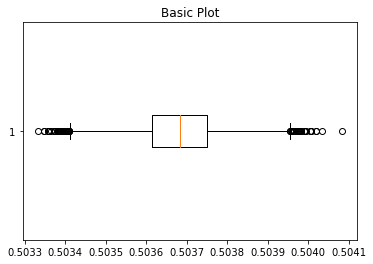

In [19]:
#data1 = np.array([[C01, C02, C03],
 #                 [DC01+1, DC02+1, DC03+1],
  #                [DC01-1, DC02-1, DC03-1]])

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data1, vert=0)
print(data1)

In [20]:
((m_e+m_mu)/m_tau+1), C03 , 2*C03

(1.05975107211598, 0.5298755360579899, 1.0597510721159797)

In [21]:
C03=(np.sqrt(3/2))*matrixdot(l0, Ml)
print('C_03=',C03)

C33=matrixdot(l3, Ml)
print('C_33=', C33)

C83=matrixdot(l8, Ml)
print('C_83',C83)

m3=0.05
m1=m3*C33+m3*np.sqrt(3)*C83+m3
print('m_1=',m1)

m10=(m3/2)*(2*(C33+C03)-1)

m2=m3*np.sqrt(3)*C83-m3*C33+m3
print('m_2=',m2)

m20=m3*C03-m3/2-m3*C33
print('m_3=',m3)

C_03= 0.5298755360579899
C_33= -0.029587955719640267
C_83 -0.560101620404361
m_1= 1.4379016917476228e-05
m_2= 0.002973174588881508
m_3= 0.05


$\Delta C_{3l}=-0.029587955719640267
\\ 
\Delta C_{8l}=-0.560101620404361$

$m_1=\frac{m_3}{2}\times(\sqrt(3)*2*C_{83}+2*C_{03}+2)$

$m_2=m_3\sqrt(3)C_{83}-m_3C_{33}+m_3$


In [22]:
(m_e-m_mu)/m_tau , C33 ,2*C33

(-0.059175911439280526, -0.029587955719640267, -0.05917591143928053)

In [23]:
1/np.sqrt(3)*((m_e+m_mu)/m_tau -2),C83, 2*C83

(-1.120203240808722, -0.560101620404361, -1.120203240808722)

In [24]:

D2m_21=m2**2-m1**2
#print(D2m_21)
D2m_32=m3**2-m2**2
#print(D2m_32)

$\Delta (m_{21})^2= 8.83956037984321e-06$

$\Delta (m_{32})^2=0.00249116023286403$

Ahora queremos representar gráficamente la relación entre estas diferencias de masa y la masa fija.

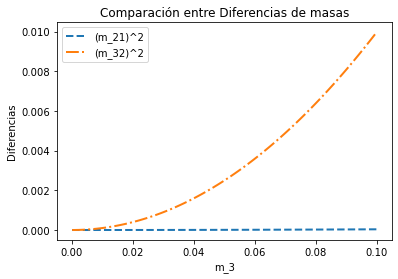

In [25]:
x=np.linspace(1e-4,1e-1,100)
def m_1(x):
    return ((x*(C33+C03)-x/2))
#m10=(x*(C33+C03)-x/2)

def m_2(x):
    return (x*C03-x/2-x*C33)
#m20=x*C03-x/2-x*C33

y1= m_2(x)**2-m_1(x)**2
y2= x**2-m_2(x)**2

# plot
fig, ax = plt.subplots()

line1, = ax.plot(x, y1, linewidth=2.0, label='(m_21)^2', linestyle='dashed')
line2, =ax.plot(x, y2, linewidth=2.0, label='(m_32)^2', linestyle='dashdot')
ax.set_xlabel('m_3')
ax.set_ylabel('Diferencias')
ax.set_title('Comparación entre Diferencias de masas')

ax.legend()
plt.show()

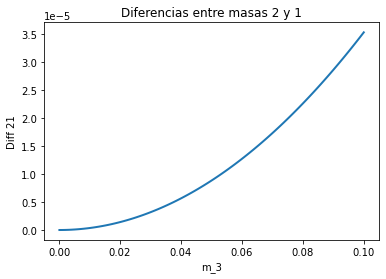

In [26]:
x=np.linspace(1e-4,1e-1,100)

# plot
fig, ax = plt.subplots()

ax.plot(x, y1, linewidth=2.0)
ax.set_xlabel('m_3')
ax.set_ylabel('Diff 21')
ax.set_title('Diferencias entre masas 2 y 1')


plt.show()


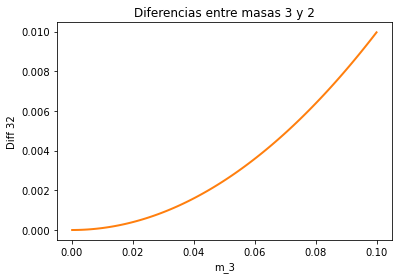

In [27]:
# plot
fig, ax = plt.subplots()

ax.plot(x, y2, linewidth=2.0, color='tab:orange')
ax.set_xlabel('m_3')
ax.set_ylabel('Diff 32')
ax.set_title('Diferencias entre masas 3 y 2')

plt.show()

Introduciendo el factor de majorana tal que $\delta_1+\delta_2=\delta, \quad \delta_1-\delta_2=0$

In [28]:
t=np.linspace(1e-4, 1e-1, 100)
def m1m(x,t):
    return (x*(C33+C03)-(x+t)/2)

#def m1m(x,t):
 #   return (x*(np.sqrt(3)*C83+C33)+(2*x-t)/2)


def m2m(x,t):
    return (x*(C03-C33)-(x+t)/2)

#def m2m(x,t):
 #   return (x*(np.sqrt(3)*C83-C33)+(2*x-t)/2)

In [29]:
m1m(0.05, 0)

1.4379016917483167e-05

In [30]:
m2m(0.05,0)

0.0029731745888815046

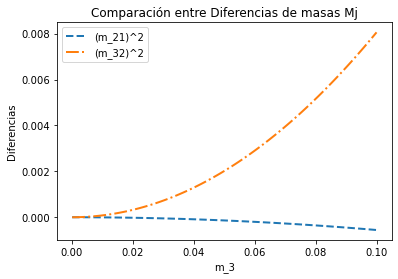

In [31]:
y1m= m2m(x,t)**2-m1m(x,t)**2
y2m= x**2-m2m(x,t)**2

# plot
fig, ax = plt.subplots()

line1, = ax.plot(x, y1m, linewidth=2.0, label='(m_21)^2', linestyle='dashed')
line2, =ax.plot(x, y2m, linewidth=2.0, label='(m_32)^2', linestyle='dashdot')
ax.set_xlabel('m_3')
ax.set_ylabel('Diferencias')
ax.set_title('Comparación entre Diferencias de masas Mj')

ax.legend()
plt.show()

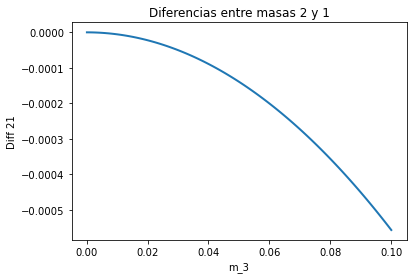

In [32]:
# plot
fig, ax = plt.subplots()

ax.plot(x, y1m, linewidth=2.0)
ax.set_xlabel('m_3')
ax.set_ylabel('Diff 21')
ax.set_title('Diferencias entre masas 2 y 1')


plt.show()

/tmp/ipykernel_28964/3517179664.py:4: RuntimeWarning: invalid value encountered in sqrt
  Z0 = np.sqrt((m2m(X,Y))**2-(m1m(X,Y))**2)


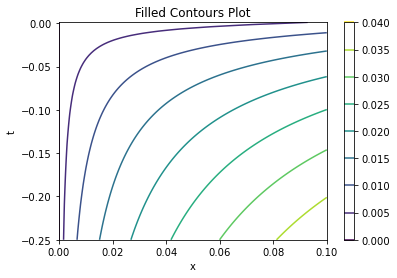

In [33]:
xlist_0 = np.linspace(0, 1e-1, 100)
ylist_0 = np.linspace(-0.25, .001, 100)
X, Y = np.meshgrid(xlist_0, ylist_0)
Z0 = np.sqrt((m2m(X,Y))**2-(m1m(X,Y))**2)
fig,ax=plt.subplots(1,1)
cp0 = ax.contour(X, Y, Z0)
fig.colorbar(cp0) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.show()

/tmp/ipykernel_28964/1806275329.py:1: RuntimeWarning: invalid value encountered in sqrt
  Z0_0 = np.sqrt(X**2-m2m(X,Y)**2)


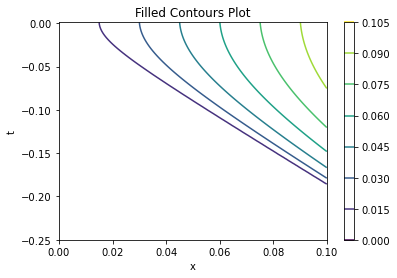

In [34]:
Z0_0 = np.sqrt(X**2-m2m(X,Y)**2)
fig,ax=plt.subplots(1,1)
cp1 = ax.contour(X, Y, Z0_0)
fig.colorbar(cp1) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.show()

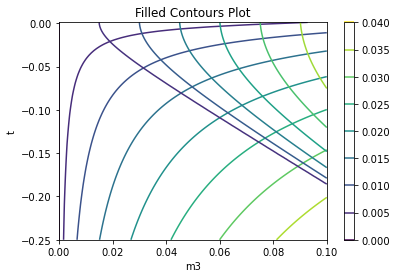

In [35]:
fig,ax=plt.subplots()

cp0 = ax.contour(X, Y, Z0)
cp1 = ax.contour(X, Y, Z0_0)


fig.colorbar(cp0) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m3')
ax.set_ylabel('t')


plt.show()

Y para el caso contrario en el que $\delta_1+\delta_2=0, \quad \delta_1-\delta_2=\delta$

In [36]:
t1=np.linspace(-0.25, 0, 100)
def m1m2(x,t):
    return (x*(C33+C03)-(x+t)/2)


def m2m2(x,t):
    return (x*(C03-C33)-(x-t)/2)

In [37]:
m1m2(0.05,0)

1.4379016917483167e-05

In [38]:
m2m2(0.05,0)

0.0029731745888815046

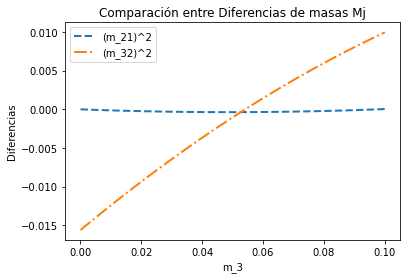

In [39]:
y1m2= m2m2(x,t1)**2-m1m2(x,t1)**2
y2m2= x**2-m2m2(x,t1)**2

# plot
fig, ax = plt.subplots()

line1, = ax.plot(x, y1m2, linewidth=2.0, label='(m_21)^2', linestyle='dashed')
line2, =ax.plot(x, y2m2, linewidth=2.0, label='(m_32)^2', linestyle='dashdot')
ax.set_xlabel('m_3')
ax.set_ylabel('Diferencias')
ax.set_title('Comparación entre Diferencias de masas Mj')

ax.legend()
plt.show()

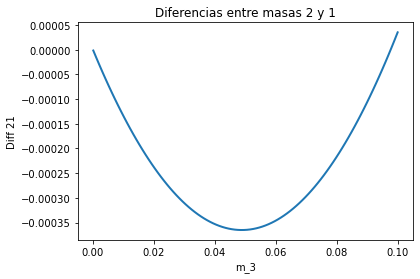

In [40]:
# plot
fig, ax = plt.subplots()

ax.plot(x, y1m2, linewidth=2.0)
ax.set_xlabel('m_3')
ax.set_ylabel('Diff 21')
ax.set_title('Diferencias entre masas 2 y 1')


plt.show()

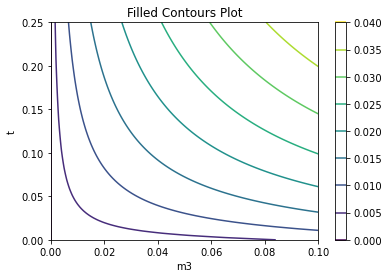

In [41]:
xlist_1 = np.linspace(0, 1e-1, 100)
ylist_1 = np.linspace(0, 0.25, 100)

X_1, Y_1 = np.meshgrid(xlist_1, ylist_1)
Z1_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)
fig,ax=plt.subplots()
cp3 = ax.contour(X_1, Y_1, Z1_0)
fig.colorbar(cp3) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m3')
ax.set_ylabel('t')

plt.show()

/tmp/ipykernel_28964/4005411137.py:1: RuntimeWarning: invalid value encountered in sqrt
  Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


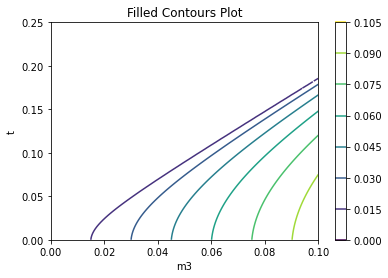

In [42]:
Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)
fig,ax=plt.subplots()
cp4 = ax.contour(X_1, Y_1, Z1_1)
fig.colorbar(cp4) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m3')
ax.set_ylabel('t')
plt.show()

/tmp/ipykernel_28964/3480324611.py:4: RuntimeWarning: invalid value encountered in sqrt
  Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


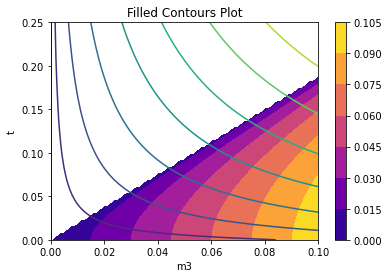

In [43]:
fig,ax=plt.subplots()

Z1_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)
Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)

mycmap1 = plt.get_cmap('plasma')

cp3 = ax.contour(X_1, Y_1, Z1_0)
cp4 = ax.contourf(X_1, Y_1, Z1_1, cmap=mycmap1)

fig.colorbar(cp4) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m3')
ax.set_ylabel('t')


plt.show()

/tmp/ipykernel_28964/2398043003.py:5: RuntimeWarning: invalid value encountered in sqrt
  Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)


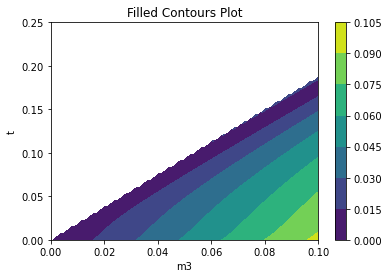

In [77]:
fig,ax=plt.subplots()

                         
Z1_0 = np.sqrt((m2m2(X_1,Y_1))**2-m1m2(X_1,Y_1)**2)
Z1_1 = np.sqrt(X_1**2-m2m2(X_1,Y_1)**2)
Z1_2= np.abs(Z1_0-Z1_1)


#cp3 = ax.contour(X_1, Y_1, Z1_0)
#cp4 = ax.contourf(X_1, Y_1, Z1_1, cmap=mycmap1)
cp4=ax.contourf(X_1, Y_1, Z1_2)

plt.colorbar(cp4) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m3')
ax.set_ylabel('t')


plt.show()